# TRAINING MODELS

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$


- $\hat{y}$ is the predicted value.

- $n$ is the number of features. 

- $x_i$ is the $i^{\text{th}}$ feature value. 

- $\theta_j$ is the $j^{\text{th}}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \dots, \theta_n$).

Dogrusal Regresyon modelinin tahmini (vektorlestirilmis form)

$$
\hat{y} = h_\theta(x) = \theta \cdot x
$$

Bu denkleme gore $\theta$ modelin parametre vektorudur ve bias terimi $\theta_0$'dan $\theta_n $'e kadar olan ozellik agirliklarini icerir.

$x$ ornegin ozellik vektorudur ve $x_0$'dan $x_n$'e kadar degerleri icerir, $x_0$ her zaman 1'e esittir.

$\theta \cdot x$ ifadesi, $\theta$ ve $x$ vektörlerinin noktasal çarpımıdır.
Bu çarpım şöyle açılır:

$$
\theta \cdot x = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n
$$

$h_\theta$, model paratmetrelerini $\theta$ kullanilarak olusturulan varsayim fonksiyonudur. 

Bir Dogrusal Regresyon Modeli icin MSE (Mean Squarred Error) Maliyet Fonskiyonu: 

$$
\text{MSE}(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^\top x^i - y^i \right)^2
$$

# Normal Denklem (Normal Equation): 

$$ 
\hat\theta = (X^\top X)^{-1} X^\top y
$$

$\hat{\theta}$ maliyet fonksiyonunu (cost function) sifir yapan $\theta$ degeridir. 

y, $y^{1}$ den $y^{m}$'e kadar olan hedef degerleri iceren vektordur. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.5284082 ],
       [2.98947305]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5284082 ],
       [10.50735431]])

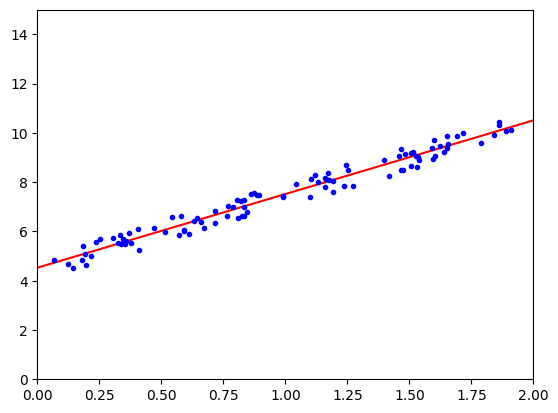

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show() 

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression() 
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([4.5284082]), array([[2.98947305]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.5284082 ],
       [10.50735431]])

In [7]:
theta_best_svd, resuduals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.5284082 ],
       [2.98947305]])

Hesaplama karmasikligi Normal Denklem, $(X^\top)$ X'in tersini hesaplar; bu matris (n + 1) x (n + 1) boyutundadir (burada n, ozellik sayisidir). Bu tur bir matrisin tersinin alinmasinin hesaplama karsikligi genellikle uygulamaya bagli olarak $O(n^2)$ ve $O(n^3)$ arasindadir. 

# GRADIENT DESCENT

Amac bir Cost Function'u optimize etmektir. En dusuk maliyet icin uygun degeri bulmaya calismaktir. Bu sayede fonksiyonlarimizin maliyeti daha da dusecektir. Bunun icin fonksiyonlarda egimden faydalaniriz. Egim, bize degisimi verir ve sifir oldugu zaman degisim yok demektir. Bu durumda minimum maliyeti bulduk demektir! Optimum $\theta$ degeri elde edilir.

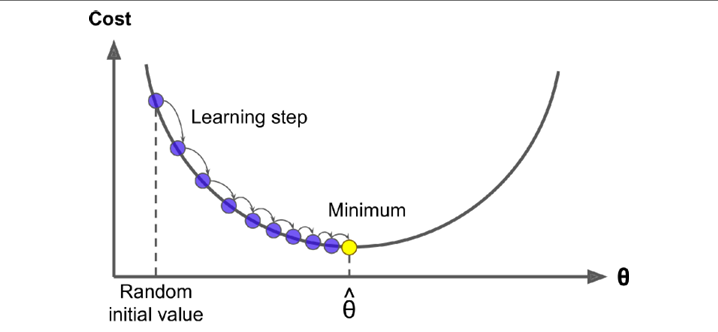

Bu Gradient Descent tasvirinde, model parametreleri rastgele başlatılır ve maliyet fonksiyonunu en aza indirmek için tekrarlayarak ayarlanır; öğrenme adım boyutu maliyet fonksiyonunun eğimiyle orantılıdır, bu yüzden parametreler minimuma yaklaşırken adımlar giderek küçülür. 


Gradyan Descent’nde önemli bir parametre, öğrenme oranı (Learning Rate) hiperparametresi ile belirlenen adım boyutudur. Öğrenme oranı çok küçükse, algoritmanın yakınsaması için birçok iterasyondan geçmesi gerekecek ve bu uzun zaman alacaktır.

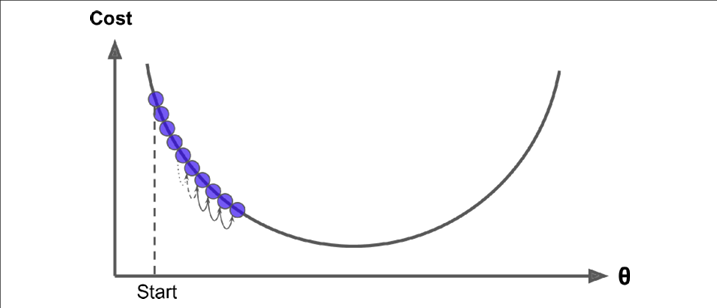

Öte yandan, eğer learning rate çok yüksekse, degerin üzerinden atlayabilir ve diğer tarafa, belki de önceden bulunduğunuzdan daha yukarıya çıkabilirsiniz. Bu durum algoritmanın sapmasına neden olabilir, değerler gittikçe büyür ve iyi bir çözüm bulmayı başaramaz.

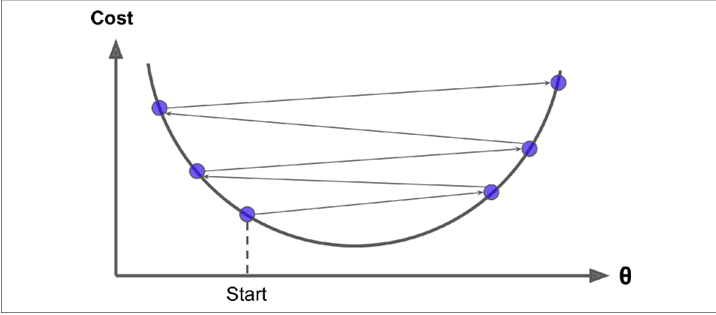


Sonuç olarak, tüm maliyet fonksiyonları güzel, düzenli kaselere benzemez. Delikler, çıkıntılar, platolar ve her türlü düzensiz arazi olabilir, bu da minimuma yakınsamayı zorlaştırır. Şekil 4-6, Gradient Descent ile ilgili iki temel zorluğu göstermektedir. Rastgele başlatma algoritmayı soldan başlatırsa, yerel bir minimuma yakınsar, bu da küresel minimum kadar iyi değildir. Sağdan başlarsa, platoyu aşması çok uzun sürecektir. Ve eğer çok erken durursanız, asla küresel minimuma ulaşamazsınız. 

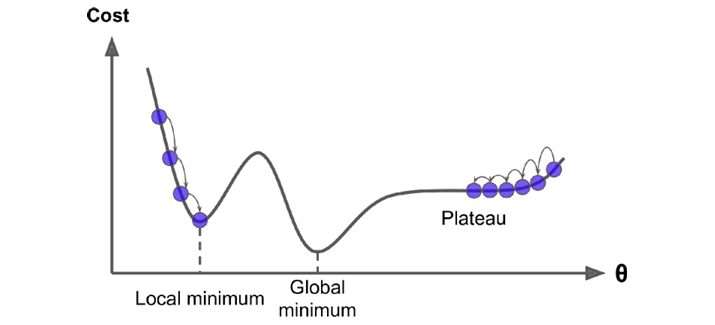


Neyse ki, Lineer Regresyon modeli için MSE maliyet fonksiyonu konvekstir; bu, eğri üzerinde herhangi iki nokta seçerseniz, onları birleştiren doğru parçasının eğriyi hiçbir zaman kesmeyeceği anlamına gelir. Bu, yerel minimum olmadığı ve sadece bir küresel minimum olduğu anlamına gelir. Ayrıca, eğimi aniden değişmeyen sürekli bir fonksiyondur. Bu iki gerçek çok önemli bir sonuca yol açar: Gradient Descent, yeterince uzun beklerseniz ve öğrenme hızı çok yüksek değilse, küresel minimuma tesadüfi olarak yaklaşması garanti edilir. Aslında, maliyet fonksiyonu bir kase şekline sahiptir, ancak özellikler çok farklı ölçeklerdeyse uzun bir kase olabilir. Ozellik 1 ve 2’nin aynı ölçeğe sahip olduğu bir eğitim setinde (solda) ve özellik 1’in değerlerinin özellik 2’den çok daha küçük olduğu bir eğitim setinde (sağda) Gradient Descent’i göstermektedir.

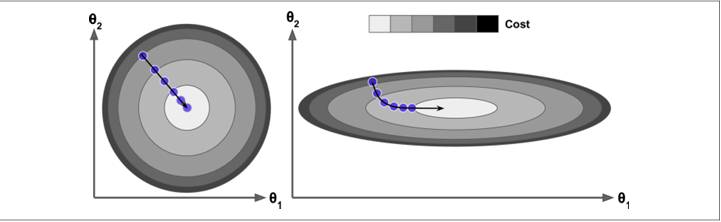

Gördüğünüz gibi, solda Gradient Descent algoritması doğrudan minimuma doğru ilerliyor ve böylece hızlıca ona ulaşıyor, oysa sağda önce global minimum yönüne neredeyse dik bir yöne gidiyor ve neredeyse düz bir vadide uzun bir yürüyüşle sona eriyor. Sonunda minimuma ulaşacak, ancak uzun zaman alacak.

## Batch Gradient Descent 

Batch Gradient Descent; Gradient Descent'i uygulamak için, her bir model parametresi $\theta_j$ ile ilgili maliyet fonksiyonunun gradyanını hesaplamanız gerekir. Başka bir deyişle, $\theta_j$ değerini biraz değiştirirseniz maliyet fonksiyonunun ne kadar değişeceğini hesaplamanız gerekir. Buna kısmi türev denir. Bu, "Doğuya bakarsam ayağımın altındaki dağın eğimi nedir?" diye sormak ve ardından kuzeye bakarak aynı soruyu sormak gibidir (ve daha fazlasını hayal edebiliyorsanız, üçten fazla boyutu olan bir evrende diğer tüm boyutlar için de aynısı geçerlidir). Maliyet fonksiyonunun θj parametresine göre kısmi türevini hesaplar ve bu, ∂ MSE(θ) / ∂θj olarak gösterilir.

$$
\frac{\partial \text{MSE}_\theta}{\partial \theta_j} 
= \frac{1}{m} \sum_{i=1}^{m} \left( \theta^\top x^i - y^i \right) x_j^i
$$

Bu kısmi türevleri tek tek hesaplamak yerine, hepsini bir kerede hesaplamak için alttaki denklemi kullanabilirsiniz. $\nabla_\theta \text{MSE}(\theta)$ ile gösterilen gradyan vektörü, maliyet fonksiyonunun tüm kısmi türevlerini (her model parametresi için bir tane) içerir.

$$
\nabla_\theta \text{MSE}(\theta) =
\begin{pmatrix}
\frac{\partial \text{MSE}(\theta)}{\partial \theta_0} \\
\frac{\partial \text{MSE}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial \text{MSE}(\theta)}{\partial \theta_n}
\end{pmatrix}
= \frac{2}{m} X^\top (X\theta - y)
$$


Merdiven vektörüne sahip olduğunuzda, bu vektör yukarı doğru işaret eder, sadece aşağıya gitmek için ters yönü izleyin. Bu, θ'dan ∇θ MSE(θ)'yi çıkarmak anlamına gelir. İşte öğrenme oranı η devreye girer: η ile merdiven vektörünü çarparak aşağı adımın büyüklüğünü belirleyin. 

$$
\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\text{MSE}(\mathbf{\theta})
$$


In [8]:
eta = 0.1 
n_iterations = 1000
m = 100 

In [9]:
theta = np.random.rand(2, 1)

for iterations in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.5284082 ],
       [2.98947305]])

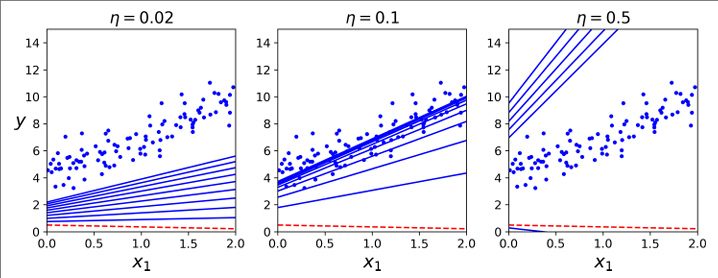

## Stochastic Graident Descent 

Stochastic Gradient Descent; Batch Gradyan İnişi ile ilgili temel problem, her adımda gradyanları hesaplamak için tüm eğitim setini kullanmasıdır; bu da eğitim seti büyük olduğunda işlemi çok yavaş yapar. Tam tersi olarak, Stokastik Gradyan İnişi, her adımda eğitim setinden rastgele bir örnek seçer ve gradyanları yalnızca o tek örneğe dayanarak hesaplar. Açıkça, her seferinde tek bir örnekle çalışmak algoritmayı çok daha hızlı hale getirir çünkü her iterasyonda manipüle etmesi gereken veri çok azdır. Ayrıca, her iterasyonda sadece bir örneğin bellekte bulunması gerektiği için büyük eğitim setleriyle eğitim yapmak da mümkündür. Öte yandan, stokastik (yani rastgele) doğası nedeniyle, bu algoritma Batch Gradyan İnişi kadar düzenli değildir: minimuma ulaşana kadar yavaşça azalmak yerine, maliyet fonksiyonu yukarı ve aşağı sıçrayacak ve yalnızca ortalama olarak azalacaktır. Zamanla minimuma çok yakın bir noktaya ulaşacaktır, ancak oraya ulaştığında da sürekli olarak etrafında sıçramaya devam edecek ve asla stabil hale gelmeyecektir. Yani algoritma durduğunda, nihai parametre değerleri iyi olsa da, optimal değildir.

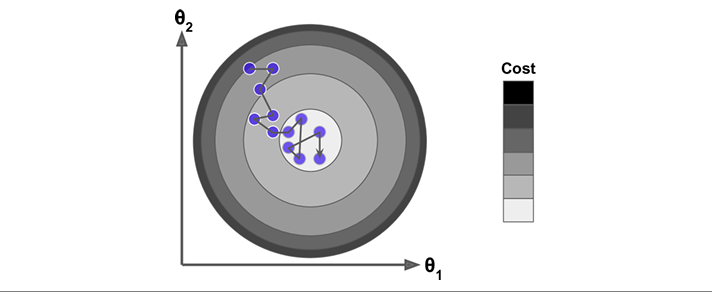



In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t): 
    return t0 / (t + t1)

theta  = np.random.rand(2, 1)

for epoch in range(n_epochs): 
    for i in range(m): 
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(n_epochs * m + i)
        theta = theta - eta * gradients

theta

array([[4.36917464],
       [3.15237589]])

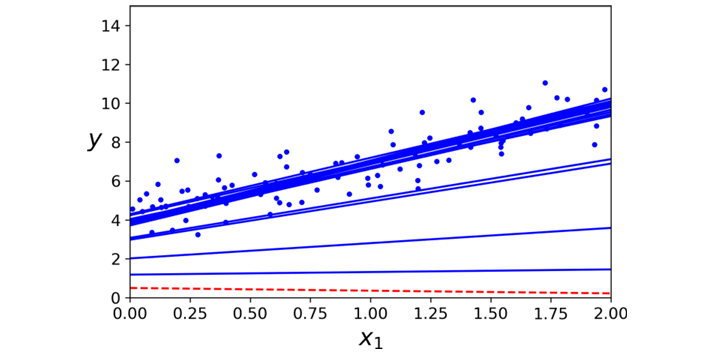

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51293016]), array([3.01163384]))

## Mini-batch Gradient Descent 

İnceleyeceğimiz son Gradient Descent algoritması Mini-batch Gradient Descent olarak adlandırılır. Batch ve Stochastic Gradient Descent’i bildiğinizde anlaması kolaydır: her adımda, gradyanları tüm eğitim setine dayanarak (Batch GD’de olduğu gibi) veya sadece bir örneğe dayanarak (Stochastic GD’de olduğu gibi) hesaplamak yerine, Mini-batch GD, mini-batch denilen küçük rastgele örnek setleri üzerinde gradyanları hesaplar. Mini-batch GD’nin Stochastic GD’ye göre başlıca avantajı, özellikle GPU kullanımı sırasında matris işlemlerinin donanım optimizasyonundan performans artışı elde edebilmenizdir. Algoritmanın parametre uzayındaki ilerleyişi, özellikle oldukça büyük mini-batch’lerle, Stochastic GD’ye göre daha az düzensizdir. Sonuç olarak, Mini-batch GD, Stochastic GD’den biraz daha minimuma yakın dolaşacaktır—ancak yerel minimumlardan kurtulması daha zor olabilir (Lineer Regresyon gibi yerel minimumlardan etkilenen problemler söz konusu olduğunda). Eğitim sırasında üç Gradient Descent algoritmasının parametre uzayında izlediği yolları göstermektedir. Hepsi minimuma yakın bir yerde sona erer, ancak Batch GD’nin yolu aslında minimumda dururken, hem Stochastic GD hem de Mini-batch GD dolaşmaya devam eder. Bununla birlikte, unutmayın ki Batch GD’nin her adımı çok zaman alır ve iyi bir öğrenme programı kullanırsanız Stochastic GD ve Mini-batch GD de minimuma ulaşacaktır.

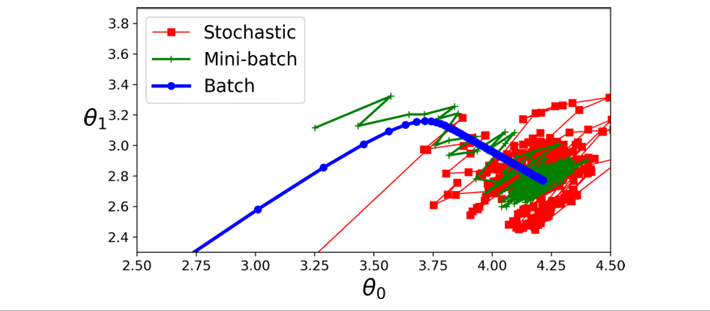

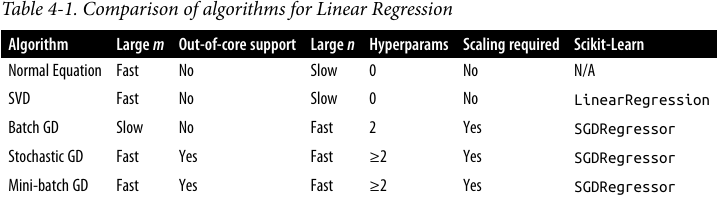

# Polynomial Regression 

In [13]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X) 
X[0]

array([0.36621944])

In [15]:
X_poly[0]

array([0.36621944, 0.13411668])

In [16]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.50643327]), array([[0.99752977, 0.48565137]]))

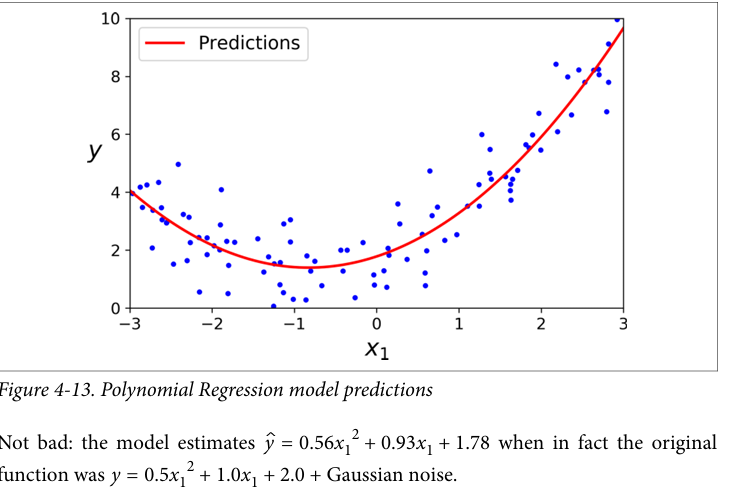

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


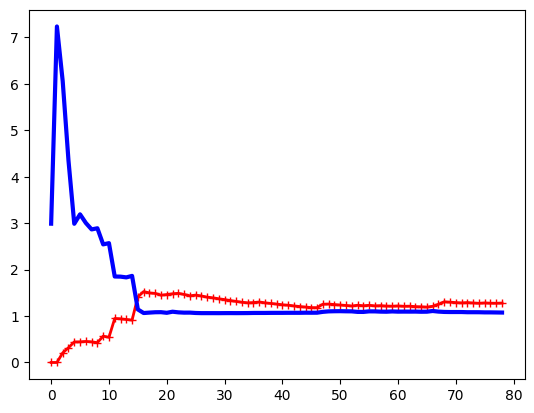

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

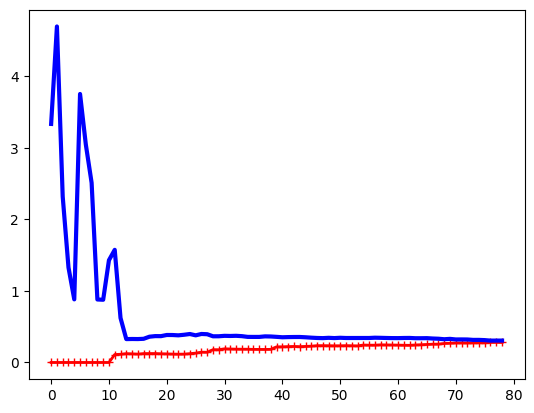

In [23]:
from sklearn.pipeline import Pipeline

poylnomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(poylnomial_regression, X, y)

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.40157525])

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.3799108])

# Logistic Regression 

Lojistik Regresyon, bazı regresyon algoritmaları sınıflandırma için de kullanılabilir (ve tersi de geçerlidir). Lojistik Regresyon (Logit Regresyon olarak da adlandırılır), bir örneğin belirli bir sınıfa ait olma olasılığını tahmin etmek için yaygın olarak kullanılır (örneğin, bu e-postanın spam olma olasılığı nedir?). Tahmin edilen olasılık %50'den büyükse, model örneğin bu sınıfa ait olduğunu tahmin eder (pozitif sınıf olarak adlandırılır ve “1” ile etiketlenir), aksi takdirde ait olmadığını tahmin eder (yani, negatif sınıfa aittir ve “0” ile etiketlenir). Bu da onu ikili bir sınıflandırıcı yapar.

Olasılıkları Tahmin Etmek Peki, Lojistik Regresyon nasıl çalışır? Lineer Regresyon modeli gibi, bir Lojistik Regresyon modeli de giriş özelliklerinin ağırlıklı toplamını (artı bir önyargı terimi) hesaplar, ancak Lineer Regresyon modelinin yaptığı gibi sonucu doğrudan vermek yerine, bu sonucun lojistiğini verir.

$$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^{\top}\boldsymbol{\theta})
$$

Lojistik—σ(·) ile gösterilir—bir sigmoid fonksiyondur (yani S şeklinde) ve 0 ile 1 arasında bir sayı üretir. Gösterildiği gibi tanımlanır.

$$
\sigma(t) = \frac{1}{1 + \exp (-t)}
$$

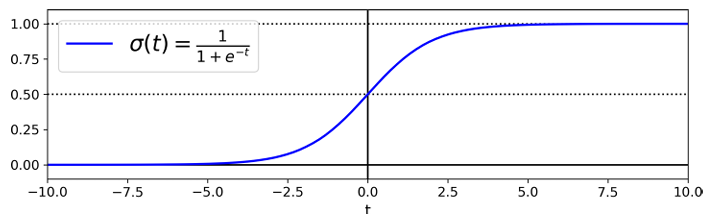


Logistic Regression icin cost functionu hesaplarsak: 


$$
J(\boldsymbol{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log(\hat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{p}^{(i)}) \right]
$$

Logistic Cost Function kısmi türevleri: 

$$
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\boldsymbol{\theta}^{\top}\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Cross Entropy Cost Function: 
$$
J(\boldsymbol{\Theta}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)}\log(\hat{p}_{k}^{(i)})
$$

In [29]:
from sklearn import datasets 
import numpy as np 
iris = datasets.load_iris() 
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [31]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int64)

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


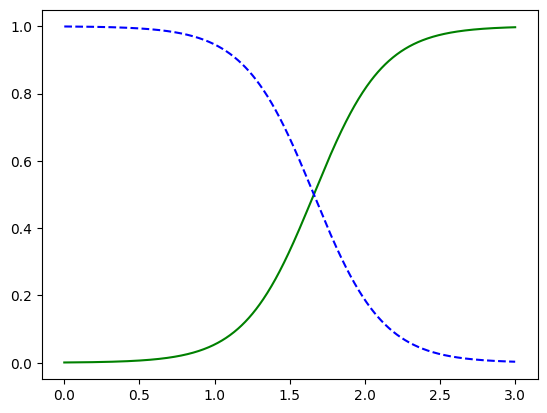

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [35]:
log_reg.predict([[1.7], [1.5]]) 

array([1, 0])

In [42]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="auto", solver = "lbfgs", C=10)
softmax_reg.fit(X, y)

C:\Users\Mustafa Baki\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'auto'


In [40]:
softmax_reg.predict([[5, 2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626373e-07, 5.73689802e-02, 9.42630398e-01]])